In [1]:
!pip install torch

In [2]:
!pip install transformers

In [3]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification


### Load Dataset

In [4]:
import json 
with open('../artifatcs/kaggle (1).json', 'r') as file:
    data = json.load(file)

In [5]:
data

{'username': 'jayathusandanuwan', 'key': 'ea4146d37bfba54116ede5e79797b15b'}

In [6]:
!pip install kaggle

In [7]:
import os
os.environ['KAGGLE_USERNAME'] = data['username']
os.environ['KAGGLE_KEY'] = data['key']

In [8]:
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

In [9]:
api.dataset_download_files('deepshah16/song-lyrics-dataset', path='../artifacts2')

In [10]:
#import zipfile
#with zipfile.ZipFile('../artifacts2/song-lyrics-dataset.zip', 'r') as zip_ref:
#    zip_ref.extractall('../artifacts2')

In [11]:
song_lyrics_df = pd.read_csv('../artifacts2/csv/ArianaGrande.csv')

### Load Model and Tokenizer

In [12]:
!pip3 install torch torchvision torchaudio

In [13]:
!pip install tensorflow
import tensorflow as tf 


In [14]:
import torch

In [15]:
pip install distutils

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement distutils (from versions: none)
ERROR: No matching distribution found for distutils


In [16]:
import distutils as _distutils
import importlib
import inspect as _inspect

In [17]:
pip install tf-keras

Note: you may need to restart the kernel to use updated packages.


In [18]:
tokenizer = AutoTokenizer.from_pretrained("arpanghoshal/EmoRoBERTa")
model = AutoModelForSequenceClassification.from_pretrained("arpanghoshal/EmoRoBERTa", from_tf=True)

All TF 2.0 model weights were used when initializing RobertaForSequenceClassification.

All the weights of RobertaForSequenceClassification were initialized from the TF 2.0 model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use RobertaForSequenceClassification for predictions without further training.


### Predict Emotions(28 emotions)

In [19]:
def predict_emotion(lyric):

    if not isinstance(lyric, str):
        lyric = str(lyric)
    
    inputs = tokenizer(lyric, return_tensors="pt", truncation=True)
    outputs = model(**inputs)
    predicted_class = torch.argmax(outputs.logits, dim=1).item()
    
    emotion_mapping = {
        0: "Admiration",
        1: "Amusement",
        2: "Anger",
        3: "Neutral",
        4: "Annoyance",
        5: "Approval",
        6: "Joy",
        7: "Fear",
        8: "Surprise",
        9: "Love",
        10: "Optimism",
        11: "Confusion",
        12: "Curiosity",
        13: "Desire",
        14: "Caring",
        15: "Disappoitnment",
        16: "Disapproval",
        17: "Disgust",
        18: "Embarrassment",
        19: "Excitement",
        20: "Gratitude",
        21: "Grief",
        22: "Nervousness",
        23: "Pride",
        24: "Realization",
        25: "Relief",
        26: "Remorse",
        27: "Sadness"
    }
    predicted_emotion = emotion_mapping.get(predicted_class, "Emot")
    return predicted_emotion

song_lyrics_df["Lyric"] = song_lyrics_df["Lyric"].astype(str)

### Apply Predicted Emotions

In [20]:
song_lyrics_df["predicted_emotion"] = song_lyrics_df["Lyric"].apply(predict_emotion)

In [21]:
print(song_lyrics_df[["predicted_emotion"]])

    predicted_emotion
0          Admiration
1            Surprise
2       Embarrassment
3             Sadness
4       Embarrassment
..                ...
303     Embarrassment
304         Gratitude
305           Disgust
306         Annoyance
307          Approval

[308 rows x 1 columns]


In [22]:
song_lyrics_df

,Artist,Title,Album,Date,Lyric,Year,predicted_emotion
0,Ariana Grande,"​thank u, next","thank u, next",2018-11-03,thought i'd end up with sean but he wasn't a m...,2018.0,Admiration
1,Ariana Grande,7 rings,"thank u, next",2019-01-18,yeah breakfast at tiffany's and bottles of bub...,2019.0,Surprise
2,Ariana Grande,​God is a woman,Sweetener,2018-07-13,you you love it how i move you you love it how...,2018.0,Embarrassment
3,Ariana Grande,Side To Side,Dangerous Woman,2016-05-20,ariana grande nicki minaj i've been here all ...,2016.0,Sadness
4,Ariana Grande,​​no tears left to cry,Sweetener,2018-04-20,right now i'm in a state of mind i wanna be in...,2018.0,Embarrassment
...,...,...,...,...,...,...,...
303,Ariana Grande,God is a Woman (Excuse me i love you LIVE),NaN,2020-12-21,you you love it how i move you love it how i t...,2020.0,Embarrassment
304,Ariana Grande,Magic*,NaN,NaN,come back soon when there is lyrics,NaN,Gratitude
305,Ariana Grande,Right here,NaN,NaN,lalalalalalala oooooh lets do what we want th...,NaN,Disgust
306,Ariana Grande,Venuss*,NaN,NaN,no lyrics for this song come back soon,NaN,Annoyance


In [23]:
song_lyrics_df_without_lyric = song_lyrics_df.drop(columns=["Lyric"])
display(song_lyrics_df_without_lyric)

,Artist,Title,Album,Date,Year,predicted_emotion
0,Ariana Grande,"​thank u, next","thank u, next",2018-11-03,2018.0,Admiration
1,Ariana Grande,7 rings,"thank u, next",2019-01-18,2019.0,Surprise
2,Ariana Grande,​God is a woman,Sweetener,2018-07-13,2018.0,Embarrassment
3,Ariana Grande,Side To Side,Dangerous Woman,2016-05-20,2016.0,Sadness
4,Ariana Grande,​​no tears left to cry,Sweetener,2018-04-20,2018.0,Embarrassment
...,...,...,...,...,...,...
303,Ariana Grande,God is a Woman (Excuse me i love you LIVE),NaN,2020-12-21,2020.0,Embarrassment
304,Ariana Grande,Magic*,NaN,NaN,NaN,Gratitude
305,Ariana Grande,Right here,NaN,NaN,NaN,Disgust
306,Ariana Grande,Venuss*,NaN,NaN,NaN,Annoyance


In [24]:
song_lyrics_df.shape

(308, 7)

In [25]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [26]:
import matplotlib.pyplot as plt

### Map Predicted Emotions to 6 Main Emotions

In [27]:
def map_to_main_emotion(predicted_emotion):
    if predicted_emotion in ["Amusement", "Approval", "Joy", "Optimism" ]:
        return "Happy"
    elif predicted_emotion in ["Annoyance", "Confusion", "Disappoitnment", "Disapproval", "Disgust", "Fear", "Grief", "Remorse", "Sadness"]:
        return "Sad"
    elif predicted_emotion in ["Admiration", "Desire", "Love", "Caring"]:
        return "Love"
    elif predicted_emotion in ["Surprise", "Excitement"  ]:
        return "Excitement"
    elif predicted_emotion in ["Curiosity", "Nervousness", "Pride", "Anger"]:
        return "Energetic"
    elif predicted_emotion in ["Gratitude", "Realization", "Relief", "Neutral", "Embarrassment"]:
        return "Calm"
    else:
        return "Unknown"

In [28]:
song_lyrics_df['main_emotion'] = song_lyrics_df['predicted_emotion'].apply(map_to_main_emotion)

### Pie Chart: Distribution of 6 Main Emotions 

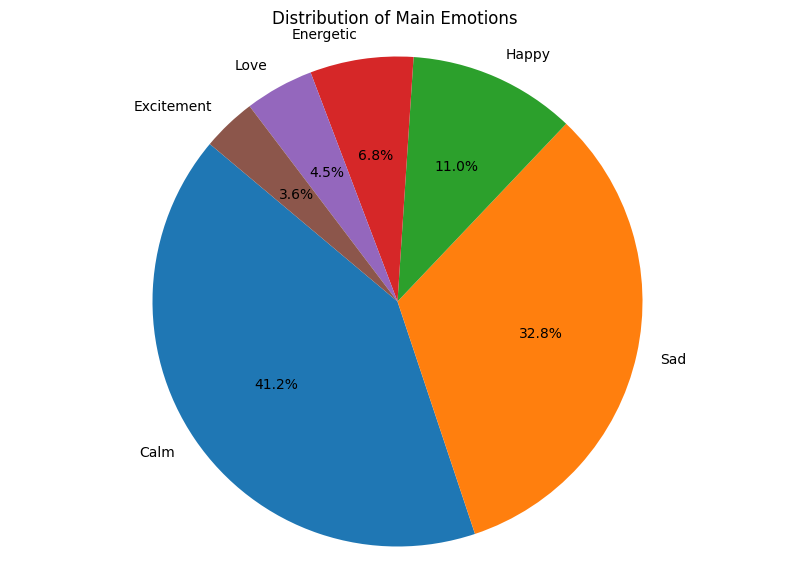

In [29]:
emotion_counts = song_lyrics_df["main_emotion"].value_counts()


plt.figure(figsize=(10, 7))
plt.pie(emotion_counts, labels=emotion_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  
plt.title('Distribution of Main Emotions ')
plt.show()

### Load dataset and save processed Dataframe

In [30]:
def process_csv_file(csv_file_path):
    
    song_lyrics_df = pd.read_csv(csv_file_path, encoding = 'latin-1')
    # Predict emotions for each song lyric
    song_lyrics_df["predicted_emotion"] = song_lyrics_df["Lyric"].apply(predict_emotion)
    # Apply the mapping function to each row and create the new main_emotion column
    song_lyrics_df['main_emotion'] = song_lyrics_df['predicted_emotion'].apply(map_to_main_emotion)
    
    print(song_lyrics_df[["Artist", "Title", "main_emotion"]])
    


    # Save the processed DataFrame to a CSV file with the name of the artist
    artist_name = song_lyrics_df['Artist'].iloc[0]  # Get the artist name from the DataFrame
    output_directory = "../artifacts3"
    output_filename = f"{artist_name}.csv"
    output_filepath = os.path.join(output_directory, output_filename)
    song_lyrics_df.to_csv(output_filepath, index=False)
    print(f"Processed data saved to: {output_filepath}")






### Directory containing the CSV files


In [31]:
csv_directory = "../artifacts2/csv"

In [32]:
import os

### Process each CSV file in the directory

In [33]:
all_dataframes = [] 
for filename in os.listdir(csv_directory):
    if filename.endswith(".csv"):
        csv_file_path = os.path.join(csv_directory, filename)
        print(f"Processing {csv_file_path}...")
        processed_df = process_csv_file(csv_file_path)
       

Processing ../artifacts2/csv\ArianaGrande.csv...
            Artist  \
0    Ariana Grande   
1    Ariana Grande   
2    Ariana Grande   
3    Ariana Grande   
4    Ariana Grande   
5    Ariana Grande   
6    Ariana Grande   
7    Ariana Grande   
8    Ariana Grande   
9    Ariana Grande   
10   Ariana Grande   
11   Ariana Grande   
12   Ariana Grande   
13   Ariana Grande   
14   Ariana Grande   
15   Ariana Grande   
16   Ariana Grande   
17   Ariana Grande   
18   Ariana Grande   
19   Ariana Grande   
20   Ariana Grande   
21   Ariana Grande   
22   Ariana Grande   
23   Ariana Grande   
24   Ariana Grande   
25   Ariana Grande   
26   Ariana Grande   
27   Ariana Grande   
28   Ariana Grande   
29   Ariana Grande   
30   Ariana Grande   
31   Ariana Grande   
32   Ariana Grande   
33   Ariana Grande   
34   Ariana Grande   
35   Ariana Grande   
36   Ariana Grande   
37   Ariana Grande   
38   Ariana Grande   
39   Ariana Grande   
40   Ariana Grande   
41   Ariana Grande   
42   